Madusanka Madiligama 01/15/2024

In [1]:
#import libraries
import os
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly as py

%matplotlib inline
     

In [2]:
# plot formatting
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['lines.linewidth'] = 3

sns.set_palette('Set2')
colors = py.colors.qualitative.Set2
colors

['rgb(102,194,165)',
 'rgb(252,141,98)',
 'rgb(141,160,203)',
 'rgb(231,138,195)',
 'rgb(166,216,84)',
 'rgb(255,217,47)',
 'rgb(229,196,148)',
 'rgb(179,179,179)']

In [3]:
#read data to df
df = pd.read_csv(
    'https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv'
)
df.head()

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [4]:
df.timeStamp = pd.to_datetime(df['timeStamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [5]:
fig = px.scatter(df, x='timeStamp', y='demand', title='NYC Energy Demand')
fig.update_traces(mode='lines+markers', marker=dict(color=colors[2]))
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list(
            [
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(count=3, label='3y', step='year', stepmode='backward'),
                dict(count=5, label='5y', step='year', stepmode='backward'),
                dict(step='all')
            ]
        )
    )
)
fig.show()

c:\Users\nikmb\.conda\envs\ts\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [6]:

df = df.set_index('timeStamp')

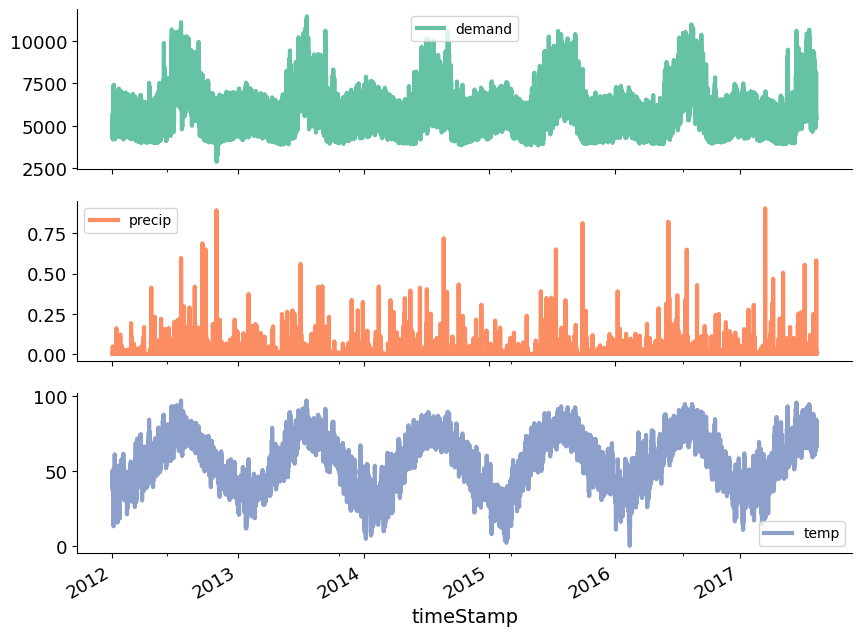

In [7]:

df.plot(subplots=True);

In [11]:
def missing_values(df):
    data = pd.DataFrame(df.isnull().sum())
    data.columns = ['# missing']
    data['% missing'] = np.round((100 * data['# missing'])/df.shape[0], 2)
    return data

In [12]:

# printing basic info about the data
print(f'Rows: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')
print(f"\nFeatures:\n{'-'*10}\n{df.columns.tolist()}")
print(f'\nMissing values:\n{"-"*15}\n{missing_values(df)}')
print(f'\nUnique values:\n{"-"*15}\n{df.nunique()}')
     

Rows: 49205
Columns: 3

Features:
----------
['demand', 'precip', 'temp']

Missing values:
---------------
        # missing  % missing
demand          0       0.00
precip        230       0.47
temp            0       0.00

Unique values:
---------------
demand    40972
precip     1004
temp       7580
dtype: int64


In [8]:
#check missing values
df[df['demand'].isnull()]

,demand,precip,temp
timeStamp,,,
2012-03-11 02:00:00,NaN,0.0000,37.78
2013-03-10 02:00:00,NaN,0.0000,38.18
2014-03-09 02:00:00,NaN,0.0000,40.86
2015-03-08 02:00:00,NaN,0.0000,36.96
2015-03-11 11:00:00,NaN,0.0000,49.95
...,...,...,...
2017-08-12 02:00:00,NaN,0.0000,70.84
2017-08-12 03:00:00,NaN,0.0000,70.57
2017-08-12 04:00:00,NaN,0.0000,69.89


In [9]:
#replace missing values with ffill
df['demand'] = df['demand'].fillna(method='ffill')
df['temp'] = df['temp'].fillna(method='ffill')

C:\Users\nikmb\AppData\Local\Temp\ipykernel_29588\1100796044.py:2: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\nikmb\AppData\Local\Temp\ipykernel_29588\1100796044.py:3: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [13]:

print(f'\nMissing values:\n{"-"*15}\n{missing_values(df)}')


Missing values:
---------------
        # missing  % missing
demand          0       0.00
precip        230       0.47
temp            0       0.00


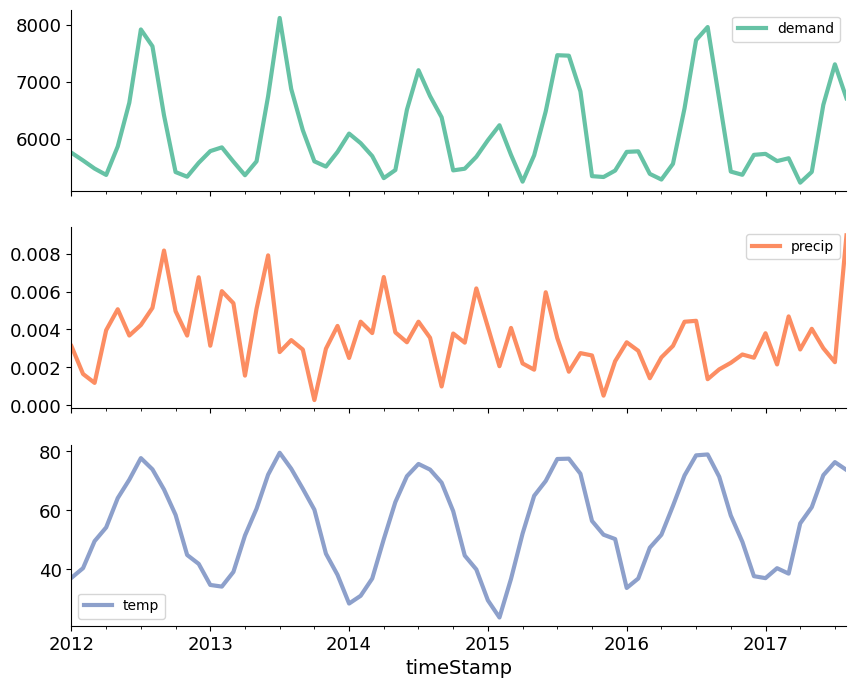

In [14]:

df.resample('M').mean().plot(subplots=True);

In [15]:
df_monthly = df.resample('M').mean()

In [17]:
import pmdarima as pm

In [18]:
model = pm.auto_arima(df_monthly['demand'], m=12, 
                      seasonal=True, start_p=0, 
                      start_q=0, max_order=4, 
                      test='adf', error_action='ignore',
                      suppress_warnings=True, stepwise=True, 
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1100.321, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1023.743, Time=0.12 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1380.758, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1065.516, Time=0.01 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1022.324, Time=0.28 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1097.636, Time=0.20 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=1015.466, Time=0.39 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1014.059, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1021.211, Time=0.04 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=99

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   68
Model:             SARIMAX(2, 0, 0)x(0, 0, [1, 2], 12)   Log Likelihood                -490.572
Date:                                 Sat, 20 Jan 2024   AIC                            993.144
Time:                                         22:09:37   BIC                           1006.461
Sample:                                     01-31-2012   HQIC                           998.420
                                          - 08-31-2017                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3721.6223    792.255      4.698      0.000    2168.830    5274.414
ar.L1          0.8586      0.123      6.985      0.000       0.618       1.099
ar.L2         -0.4748      0.142     -3.352      0.001      -0.752      -0.197
ma.S.L12       0.8923      0.137      6.501      0.000       0.623       1.161
ma.S.L24       0.4571      0.206      2.222      0.026       0.054       0.860
sigma2      9.046e+04   1.58e+04      5.726      0.000    5.95e+04    1.21e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 5.55
Prob(Q):                              0.89   Prob(JB):                         0.06
Heteroskedasticity (H):               0.78   Skew:                             0.52
Prob(H) (two-sided):                  0.55   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

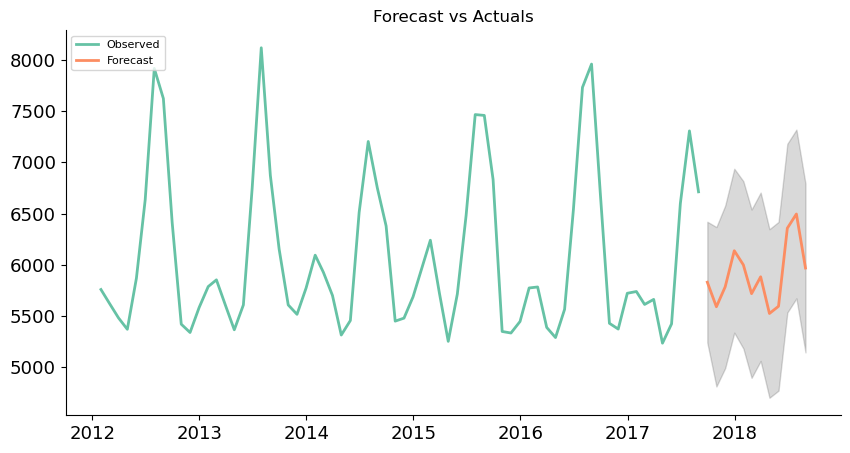

In [25]:
# Number of periods to predict
n_periods = 12  # For example, to predict the next 12 months

# Predicting future values
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)


forecast_index = pd.date_range(start=df_monthly.index[-1], periods=n_periods + 1, freq='M')[1:]

forecast_series = pd.Series(forecast, index=forecast_index)
lower_series = pd.Series(conf_int[:, 0], index=forecast_index)
upper_series = pd.Series(conf_int[:, 1], index=forecast_index)

# Now you can visualize the forecast along with the confidence intervals
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_monthly['demand'], label='Observed',lw=2)
plt.plot(forecast_series, label='Forecast',lw=2)
plt.fill_between(forecast_index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
